In [1]:
from preprocess import load, preprocess
from train import train_test_split, train_polynom, train_lr, train_rf, train_svr, train_xgboost
from config import config_rf, config_svr
from save import save_model
from visualize import visualization
from predict import prediction

In [2]:
df, asset_details = load("train.csv", "asset_details.csv")

In [3]:
df_without_null_scaled = preprocess(df, asset_details)

In [4]:
df_without_null_scaled

,timestamp,Name,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,Bitcoin Cash,-0.024067,-0.022942,-0.024679,-0.024478,-0.283093,-0.024759,-0.004218
1,1514764860,Binance Coin,-0.500484,-0.500412,-0.500508,-0.500482,-0.260371,-0.500483,-0.014399
2,1514764860,Bitcoin,2.281239,2.296402,2.266521,2.284183,-0.278361,2.279630,-0.014643
3,1514764860,EOS_IO,-0.500659,-0.500586,-0.500685,-0.500658,2.255234,-0.500659,-0.013922
4,1514764860,Ethereum Classic,-0.496986,-0.496939,-0.496994,-0.496992,-0.243965,-0.496990,-0.008264
...,...,...,...,...,...,...,...,...,...
97599,1515526200,Binance Coin,-0.498688,-0.498613,-0.498699,-0.498672,-0.267685,-0.498678,-0.002602
97600,1515526200,Bitcoin,2.483343,2.472935,2.485137,2.481164,-0.283053,2.481570,-0.002134
97601,1515526200,EOS_IO,-0.500328,-0.500257,-0.500350,-0.500326,-0.265686,-0.500327,-0.005362
97602,1515526200,Ethereum Classic,-0.495307,-0.495272,-0.495307,-0.495318,-0.175423,-0.495306,0.001431


In [5]:
names = set(df["Name"])

In [6]:
names

{'Binance Coin',
 'Bitcoin',
 'Bitcoin Cash',
 'EOS_IO',
 'Ethereum',
 'Ethereum Classic',
 'Litecoin',
 'Monero'}

Для криптовалюты Ethereum MAE на rf: 0.0062637
Для криптовалюты Bitcoin Cash MAE на rf: 0.0036586
Для криптовалюты Bitcoin MAE на rf: 0.0024364
Для криптовалюты Binance Coin MAE на rf: 0.0142474
Для криптовалюты Monero MAE на rf: 0.0087746
Для криптовалюты EOS_IO MAE на rf: 0.0085191
Для криптовалюты Ethereum Classic MAE на rf: 0.0097026
Для криптовалюты Litecoin MAE на rf: 0.0030597
CPU times: user 4min 46s, sys: 199 ms, total: 4min 46s
Wall time: 1min 14s


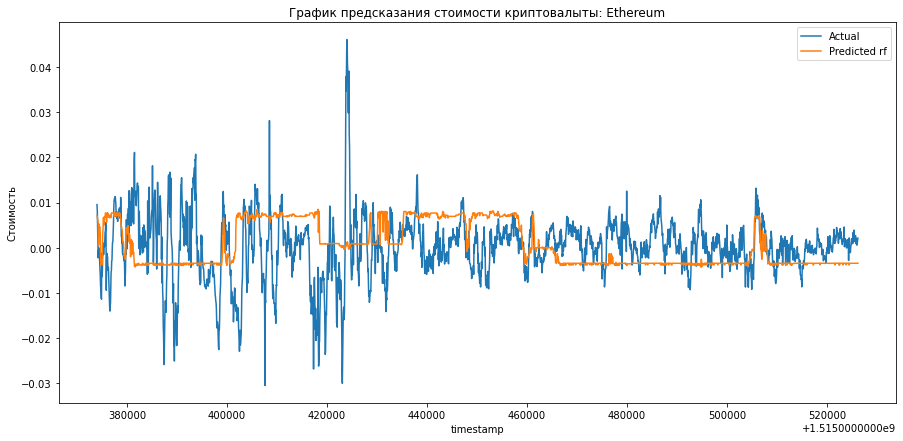

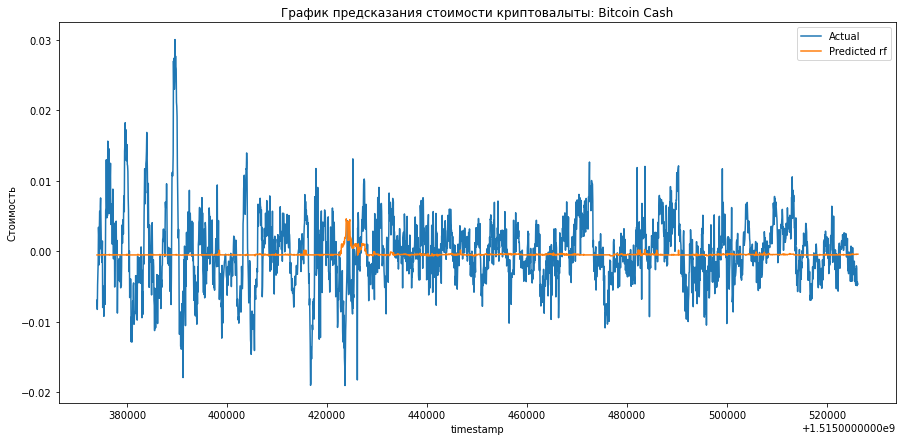

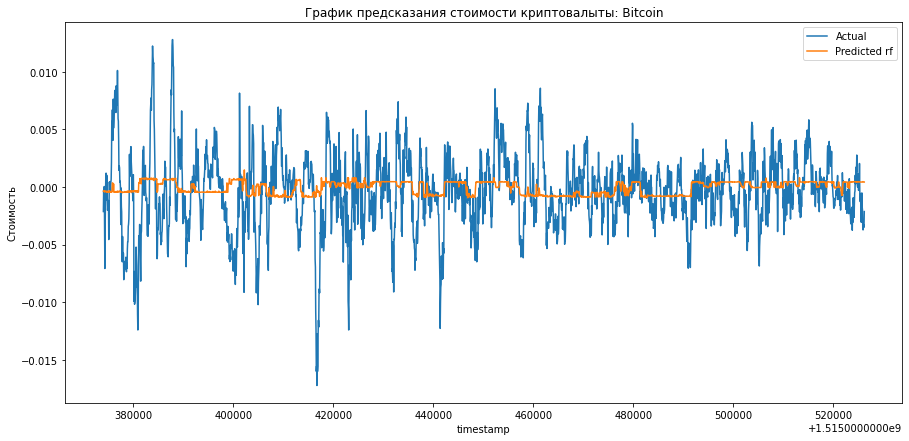

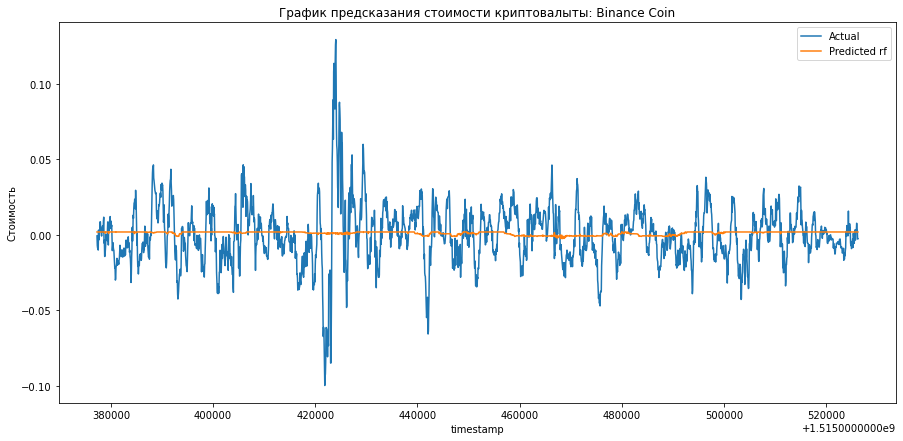

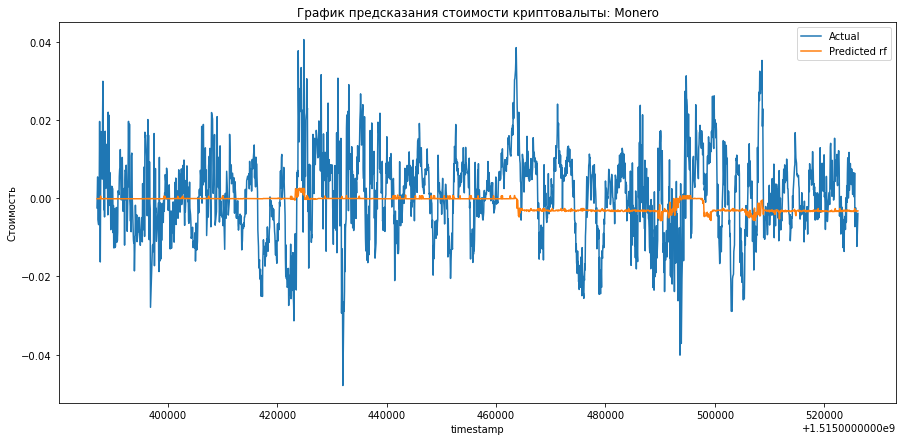

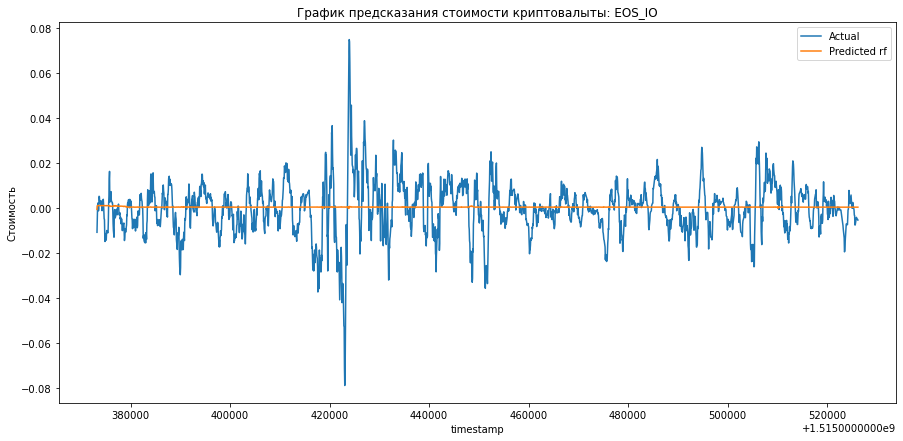

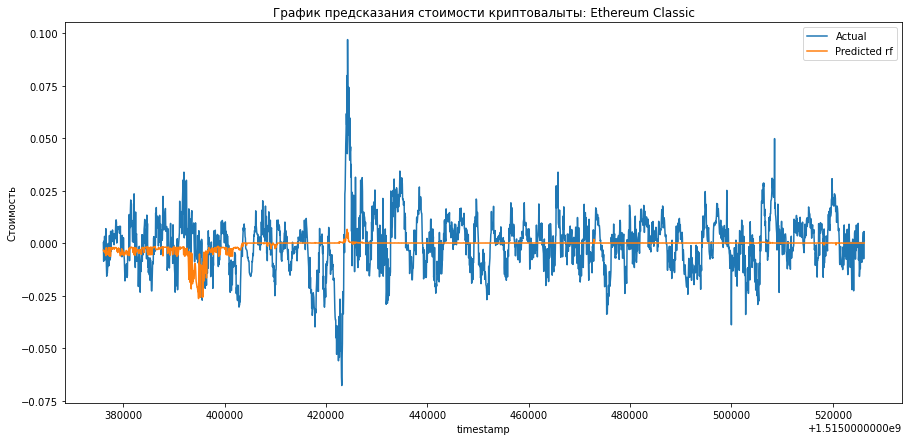

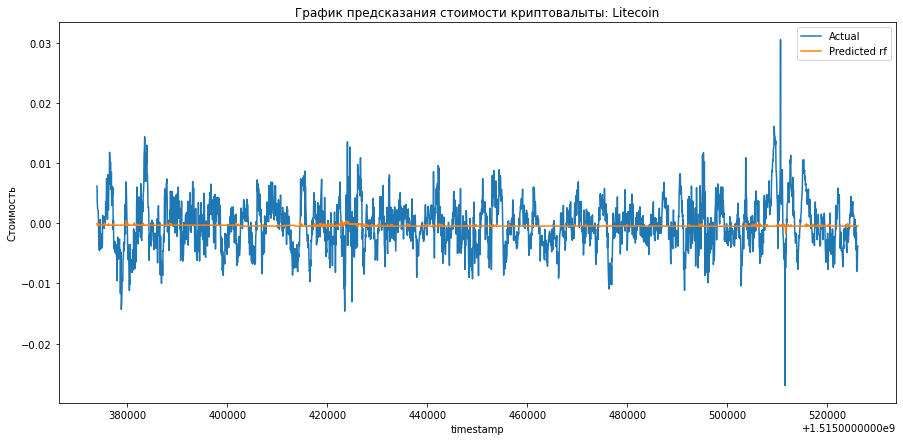

In [7]:
%%time
#random_forest
for name in names:
    X_train, X_valid, y_train, y_valid = train_test_split(name, df_without_null_scaled)
    model = train_rf(name, X_train, y_train)
    save_model(name, "rf", model)
    visualization(name, df_without_null_scaled, "rf")

Для криптовалюты Ethereum MAE на polynom: 0.0055092
Для криптовалюты Bitcoin Cash MAE на polynom: 0.0036666
Для криптовалюты Bitcoin MAE на polynom: 0.0026306
Для криптовалюты Binance Coin MAE на polynom: 0.0145041
Для криптовалюты Monero MAE на polynom: 0.0088333
Для криптовалюты EOS_IO MAE на polynom: 0.0084369
Для криптовалюты Ethereum Classic MAE на polynom: 0.0096154
Для криптовалюты Litecoin MAE на polynom: 0.003284
CPU times: user 6.24 s, sys: 69.8 ms, total: 6.31 s
Wall time: 1.7 s


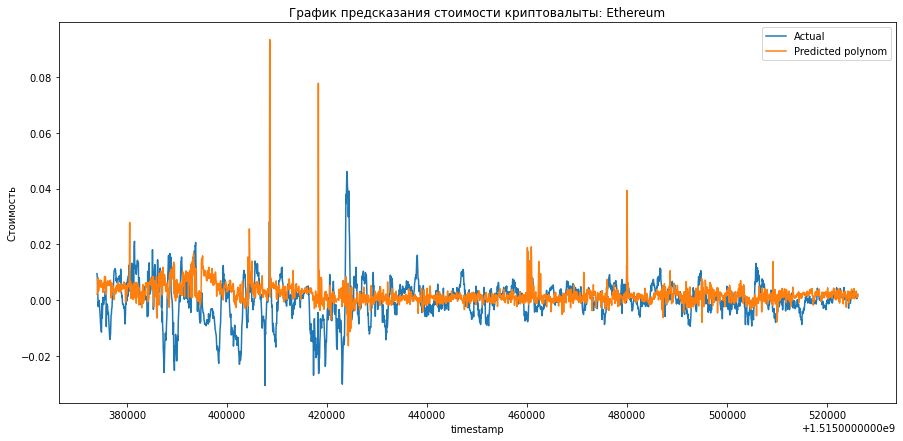

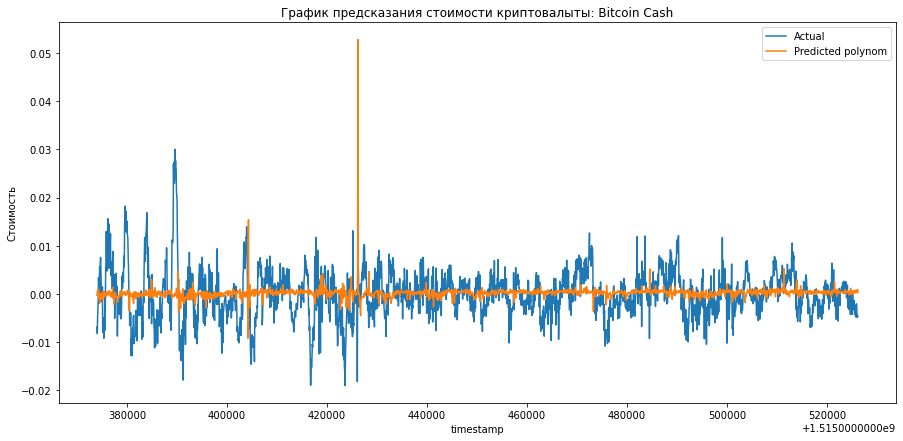

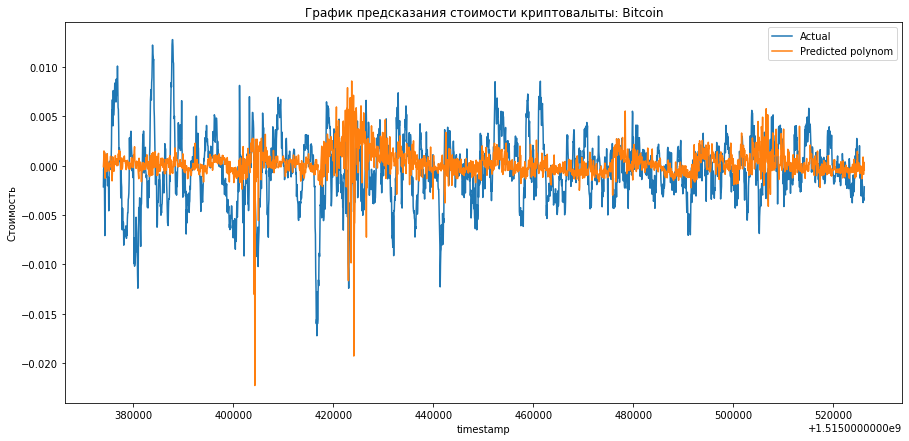

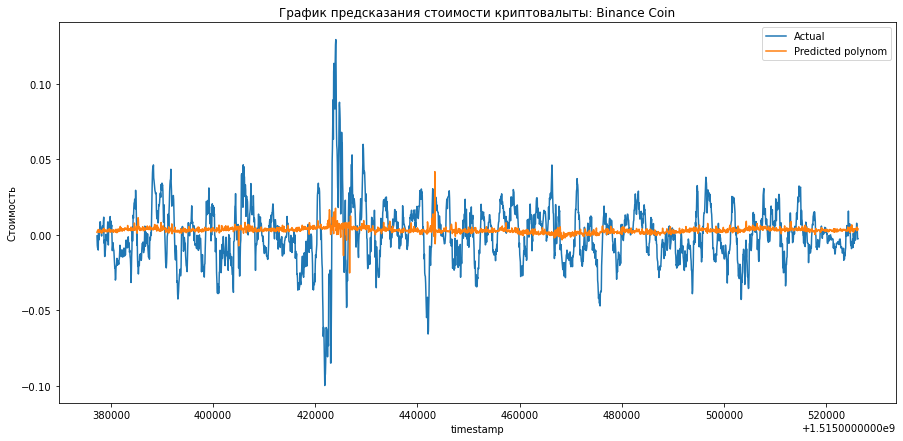

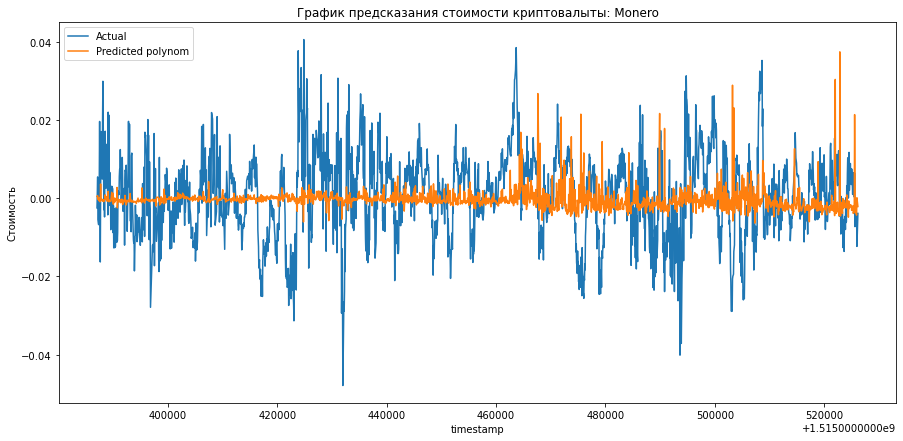

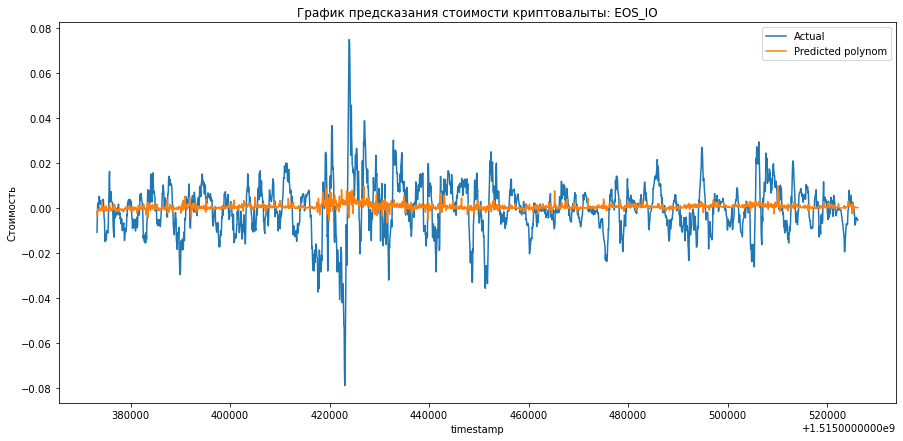

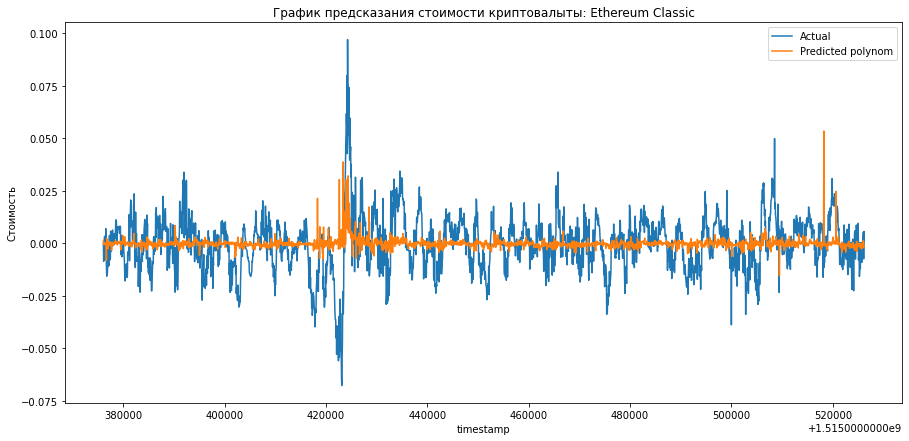

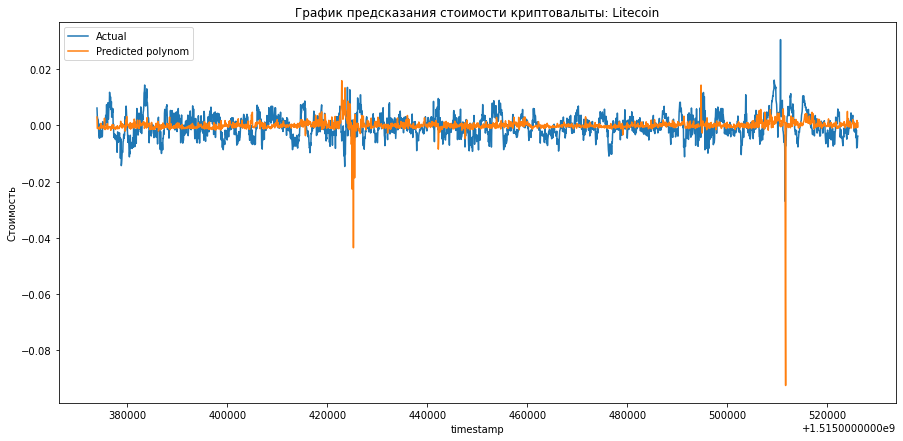

In [10]:
%%time
#polynom
for name in names:
    X_train, X_valid, y_train, y_valid = train_test_split(name, df_without_null_scaled)
    model = train_polynom(X_train, y_train)
    save_model(name, "polynom", model)
    visualization(name, df_without_null_scaled, "polynom")

Для криптовалюты Ethereum MAE на xgboost: 0.0077971
Для криптовалюты Bitcoin Cash MAE на xgboost: 0.0037357
Для криптовалюты Bitcoin MAE на xgboost: 0.0033075
Для криптовалюты Binance Coin MAE на xgboost: 0.0147572
Для криптовалюты Monero MAE на xgboost: 0.0088827
Для криптовалюты EOS_IO MAE на xgboost: 0.0087844
Для криптовалюты Ethereum Classic MAE на xgboost: 0.0099497
Для криптовалюты Litecoin MAE на xgboost: 0.0036958
CPU times: user 11.2 s, sys: 90.1 ms, total: 11.3 s
Wall time: 2.97 s


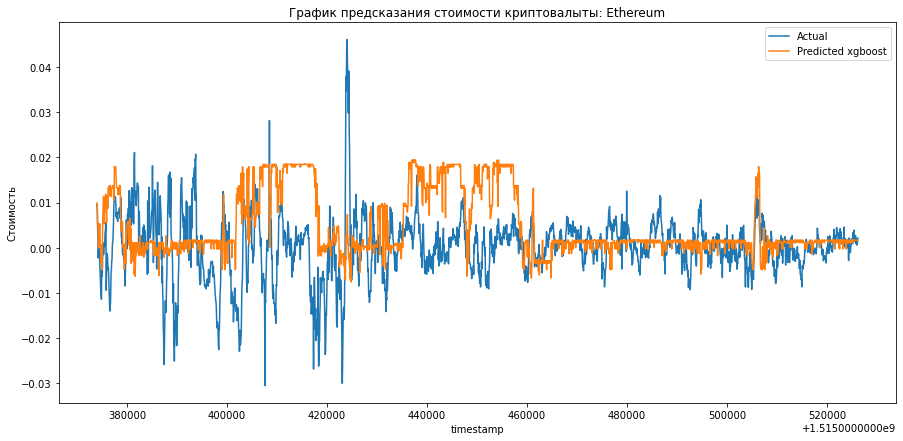

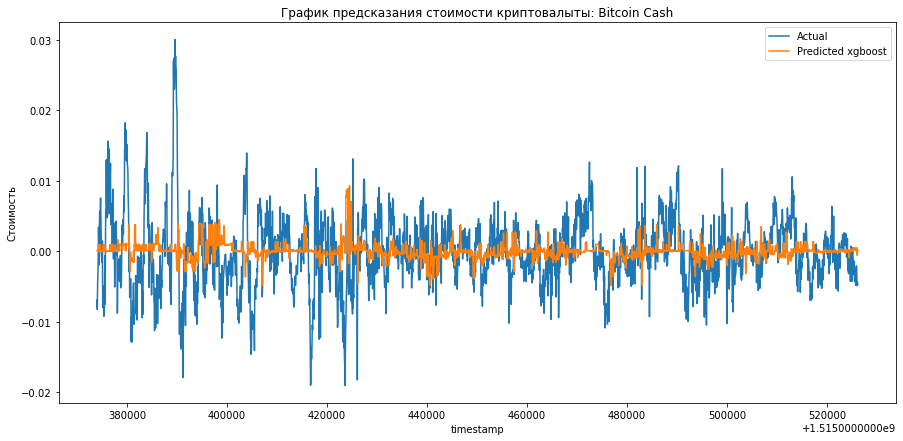

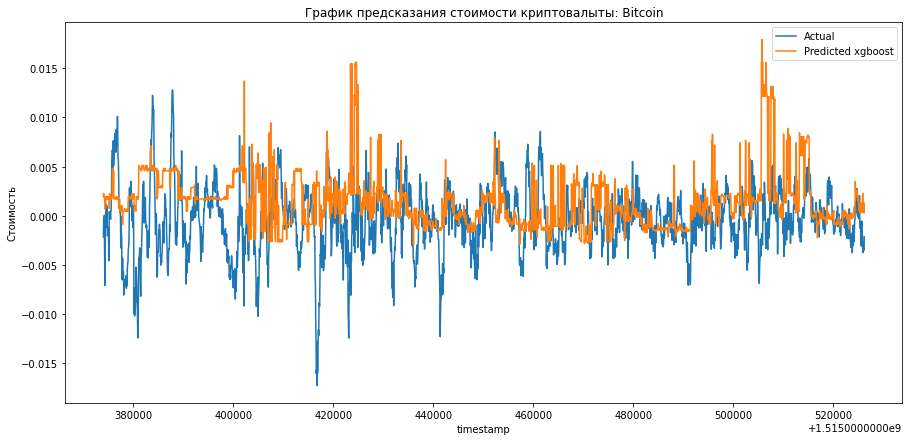

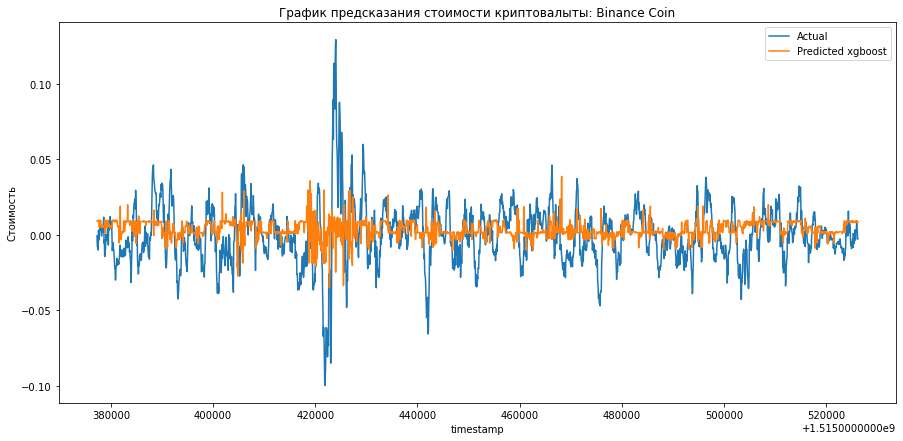

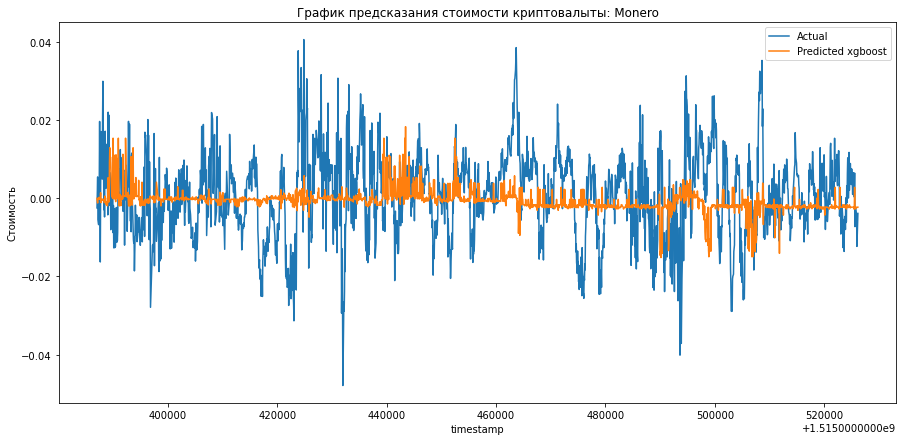

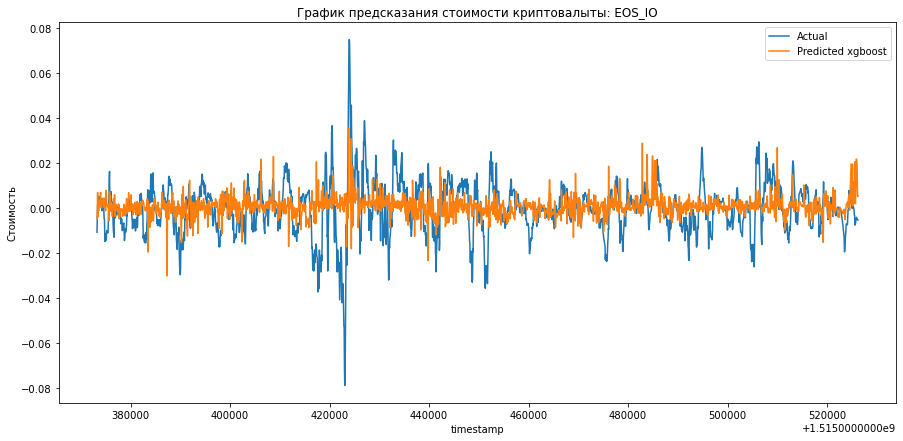

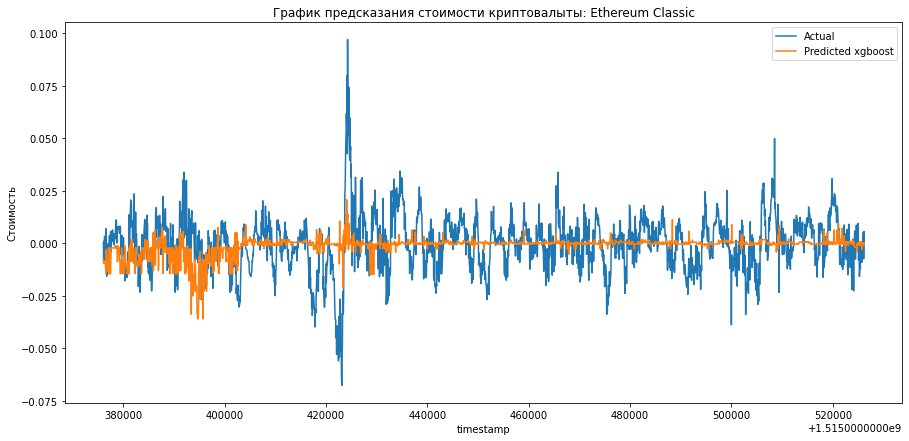

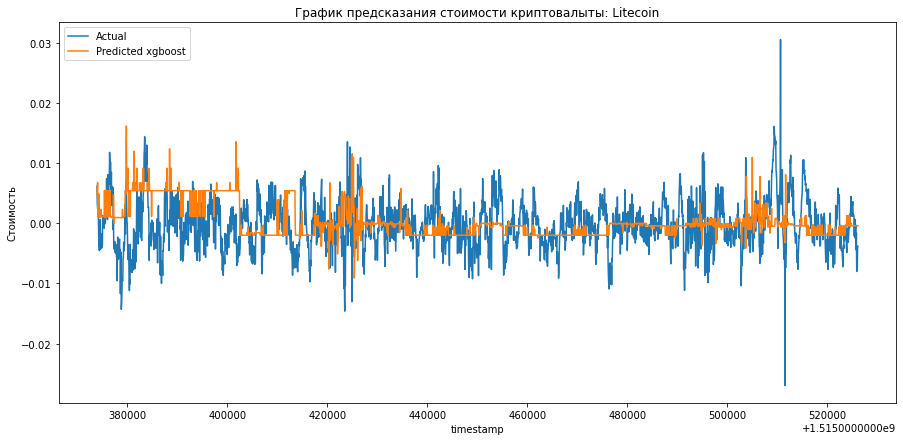

In [11]:
%%time
#xgboost
for name in names:
    X_train, X_valid, y_train, y_valid = train_test_split(name, df_without_null_scaled)
    model = train_xgboost(name, X_train, y_train)
    save_model(name, "xgboost", model)
    visualization(name, df_without_null_scaled, "xgboost")